# PREDICTING CUSTOMER CHURN FOR TELECOM OPERATOR USING LOGISTIC REGRESSION

In [52]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
#loading data
df_churn = pd.read_excel("C:\\Data\\CustomerChurn.xlsx")
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [14]:
#check null value
pd.isnull(df_churn).any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [15]:
#converting categorical variables to dummy code
for col in df_churn.columns:
    if df_churn[col].dtype == 'object':
        df_churn[col] = pd.Categorical(df_churn[col]).codes
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,74,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,3624,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,536,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,3570,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,674,1


In [16]:
#creating indpendent and dependent variables
x1 = df_churn.drop('Churn', axis = 1)
y = df_churn['Churn']
x = x1.drop('customerID', axis = 1)

In [17]:
#creating train and test set
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 1)
train_x.shape
test_x.shape
train_x.shape
test_x.shape

(5282, 19)

(1761, 19)

(5282, 19)

(1761, 19)

In [19]:
#Building Logistic regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
log.coef_

array([[ -1.03572491e-01,   2.23597154e-01,   3.21939619e-02,
         -1.62877109e-01,  -2.24978173e-03,  -5.56799963e-01,
          1.21572323e-01,   4.79511876e-02,  -2.46642382e-01,
         -1.18530630e-01,  -8.89076889e-02,  -2.29547141e-01,
          2.37008701e-02,   4.35815033e-02,  -7.06860461e-01,
          2.13721051e-01,  -9.46482642e-02,   3.25213926e-02,
         -4.77761705e-04]])

In [21]:
#finding key predictor of churn
coeff = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(log.coef_))], axis = 1)
coeff.columns = ("Variable", "coeff")
coeff.sort_values("Variable", ascending = True)

,Variable,coeff
14,Contract,-0.706860
3,Dependents,-0.162877
10,DeviceProtection,-0.088908
7,InternetService,0.047951
17,MonthlyCharges,0.032521
6,MultipleLines,0.121572
9,OnlineBackup,-0.118531
8,OnlineSecurity,-0.246642
15,PaperlessBilling,0.213721
2,Partner,0.032194


In [23]:
classes = log.predict(test_x)
print(classes.size)
print("Positive Cases in test data", test_y[test_y == 1]. shape[0])
print("Negative Cases in test data", test_y[test_y == 0]. shape[0])

1761
Positive Cases in test data 434
Negative Cases in test data 1327


In [24]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y, classes))

Accuracy Score
0.804656445202


In [26]:
print("precision/recalls metrics")
print(metrics.classification_report(test_y, classes))

precision/recalls metrics
             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1327
          1       0.62      0.53      0.57       434

avg / total       0.80      0.80      0.80      1761



In [27]:
print("AUC")
auc = metrics.roc_auc_score(test_y, classes)
auc

AUC


0.71145110935931855

Confusion matrix


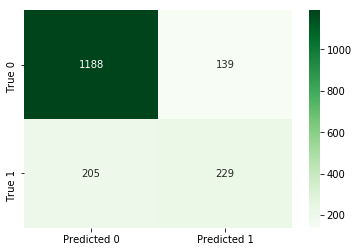

In [28]:
import matplotlib.pyplot as plt
print("Confusion matrix")
cf = metrics.confusion_matrix(test_y, classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot = True, cmap = "Greens", fmt = "d", xticklabels=lbl1, yticklabels=lbl2)
plt.show();

Text(0.5,1,'ROCR Chart')

(0, 1)

(0, 1)

Text(0.5,0,'True Positive Rate')

Text(0,0.5,'False Positive Rate')

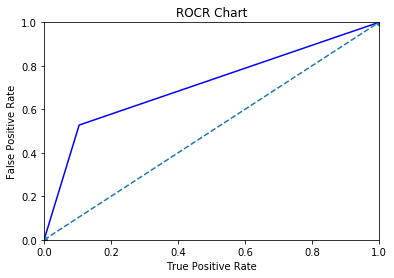

In [29]:
#ROC Chart
fpr, tpr, th = roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROCR Chart')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

In [ ]:
Removing insignificant independent variables and rebuilding model again

In [30]:
#finding key predictors of churn
coeff = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(log.coef_))], axis = 1)
coeff.columns = ("Variable", "coeff")
coeff.sort_values("Variable", ascending = True)

,Variable,coeff
14,Contract,-0.706860
3,Dependents,-0.162877
10,DeviceProtection,-0.088908
7,InternetService,0.047951
17,MonthlyCharges,0.032521
6,MultipleLines,0.121572
9,OnlineBackup,-0.118531
8,OnlineSecurity,-0.246642
15,PaperlessBilling,0.213721
2,Partner,0.032194


In [31]:
x1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,536
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3570
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,674


In [32]:
#Removing insigficant TotalCharges
x2 = df_churn.drop('customerID', axis = 1)
x2 = x2.drop('Churn', axis = 1)
#x2 = x2.drop('DeviceProtection', axis = 1)
#x2 = x2.drop('InternetService', axis = 1)
#x2 = x2.drop('MonthlyCharges', axis = 1)
#x2 = x2.drop('Partner', axis = 1)
#x2 = x2.drop('PaymentMethod', axis = 1)
#x2 = x2.drop('StreamingTV', axis = 1)
#x2 = x2.drop('StreamingMovies', axis = 1)
x2 = x2.drop('TotalCharges', axis = 1)
#x2 = x2.drop('tenure', axis = 1)
x2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70


In [33]:
#create train and test set
train_x2, test_x2, train_y2, test_y2 = train_test_split(x2, y, test_size = 0.25, random_state = 1)
train_x2.shape
test_x2.shape
train_x2.shape
test_x2.shape

(5282, 18)

(1761, 18)

(5282, 18)

(1761, 18)

In [34]:
#Building Logistic regresstion model
from sklearn.linear_model import LogisticRegression
log2 = LogisticRegression()

In [35]:
log2.fit(train_x2, train_y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
log2.coef_

array([[-0.00801107,  0.24170286,  0.05320715, -0.09446304, -0.03609807,
        -0.90301665,  0.09424371,  0.24915069, -0.26043632, -0.1246404 ,
        -0.09785369, -0.24362926,  0.00212574,  0.03318368, -0.64467767,
         0.32791677,  0.04828335,  0.02828557]])

In [37]:
#finding key predictors of churn
coeff2 = pd.concat([pd.DataFrame(x2.columns), pd.DataFrame(np.transpose(log2.coef_))], axis = 1)
coeff2.columns = ("Variable", "coeff")
coeff2.sort_values("Variable", ascending = True)

,Variable,coeff
14,Contract,-0.644678
3,Dependents,-0.094463
10,DeviceProtection,-0.097854
7,InternetService,0.249151
17,MonthlyCharges,0.028286
6,MultipleLines,0.094244
9,OnlineBackup,-0.124640
8,OnlineSecurity,-0.260436
15,PaperlessBilling,0.327917
2,Partner,0.053207


In [38]:
classes2 = log2.predict(test_x2)
print(classes2.size)
print("Positive Cases in test data", test_y2[test_y2 == 1]. shape[0])
print("Negative Cases in test data", test_y2[test_y2 == 0]. shape[0])

1761
Positive Cases in test data 434
Negative Cases in test data 1327


In [39]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y2, classes2))

Accuracy Score
0.804656445202


In [40]:
print("precision/recalls metrics")
print(metrics.classification_report(test_y2, classes2))

precision/recalls metrics
             precision    recall  f1-score   support

          0       0.86      0.88      0.87      1327
          1       0.61      0.56      0.59       434

avg / total       0.80      0.80      0.80      1761



In [43]:
print("AUC")
auc2 = metrics.roc_auc_score(test_y2, classes2)
auc2

AUC


0.72230508509892033

Confusion matrix


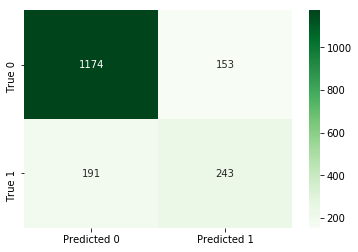

In [42]:
import matplotlib.pyplot as plt
print("Confusion matrix")
cf = metrics.confusion_matrix(test_y2, classes2)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot = True, cmap = "Greens", fmt = "d", xticklabels=lbl1, yticklabels=lbl2)
plt.show();

Text(0.5,1,'ROCR Chart')

(0, 1)

(0, 1)

Text(0.5,0,'True Positive Rate')

Text(0,0.5,'False Positive Rate')

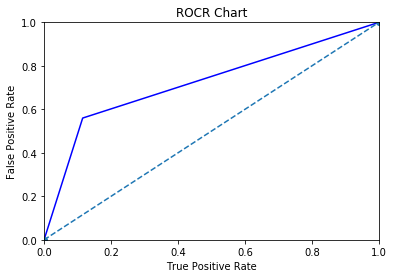

In [58]:
# ROC Chart
fpr, tpr, th = roc_curve(test_y2, classes2)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROCR Chart')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

# Conclusion
Before removing TotalCharges - AUC score = .711. After removing TotalCharges - AUC score = .722 . 
Hence model after removing TotalCharges is a better model

In [45]:
#Decision tree with train_x and train_y

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 2)
dt.fit(train_x, train_y)
classes = dt.predict(test_x)
auc = metrics.roc_auc_score(test_y, classes)
auc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.75500331644435492